# **Collaborative Filtering on Video Game Recommendation System**

The case study that I chose is *Case 2 : E-commerce.* The challenge of e-commerce platforms that I chose to solve is *ineffective target marketing via recommended choices.* 

The dataset used for this case study is taken from a Kaggle page. The dataset contains many attributes, but only a few that are of interests for this recommendation system case study. I made some minor adjustments to the original dataset from Kaggle, such as deleting the columns I don't need in this case study. Here is the descriptions of the attributes after adjustments applied to the original kaggle dataset. *The modified dataset contains a list of users, the steam games they played, along with the number of hours played for that particular game.*

The attributes of the dataset are as follows :

1.	**userId** : Every user identified with a unique id (Structured)
2.	**steam_game** : Every game is identified with a unique name (Unstructured)
3.	**hours_played** : Number of Hours played for a game(Structured)



In [1]:
import pandas as pd
import numpy as np
## Read the dataset
df = pd.read_csv('steam-200k.csv', header=None, names = ['userId', 'Steam_game', 'Behavior_name', 
                                                                 'behavior', 'unknown_column'])

In [2]:
df.head()

,userId,Steam_game,Behavior_name,behavior,unknown_column
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [3]:
## Filter the rows that have behavior_name as play as we only want the playing hours of games. And Remove the unwanted columns
df = df[df.Behavior_name == 'play']
df = df.drop(['Behavior_name', 'unknown_column'], axis=1)
df = df.rename(columns = {'behavior':'Hours_played'})

In [4]:
df['Hours_played'] = df['Hours_played'].astype(np.float64)
df = df[df.Hours_played <= 30]
df.sort_values(by=['userId'], inplace=True)
df.head()

,userId,Steam_game,Hours_played
65428,5250,Portal 2,13.6
65430,5250,Alien Swarm,4.9
65432,5250,Team Fortress 2,0.8
65434,5250,Dota 2,0.2
55933,76767,Portal 2,15.0


**The dataset contains 57k records and 3 columns (userId, Steam_game, Hours_played)**

In [5]:
# Shape of the data
df.shape

(57267, 3)

In [6]:
# Taking a subset for assignment purpose because the dataset is too big
steam_df = df.iloc[:3000, :]

In [7]:
steam_df.head()

,userId,Steam_game,Hours_played
65428,5250,Portal 2,13.6
65430,5250,Alien Swarm,4.9
65432,5250,Team Fortress 2,0.8
65434,5250,Dota 2,0.2
55933,76767,Portal 2,15.0


In [8]:
steam_df.shape

(3000, 3)

In [9]:
# Check for any missing values
print('Missing values across columns : \n', steam_df.isnull().sum())

Missing values across columns : 
 userId          0
Steam_game      0
Hours_played    0
dtype: int64


**Visualize the distribution of playing hours per game for each Steam user.**

In [10]:
steam_df.Hours_played.describe()

count    3000.000000
mean        5.729633
std         6.900575
min         0.100000
25%         0.800000
50%         2.700000
75%         8.300000
max        30.000000
Name: Hours_played, dtype: float64

<AxesSubplot:>

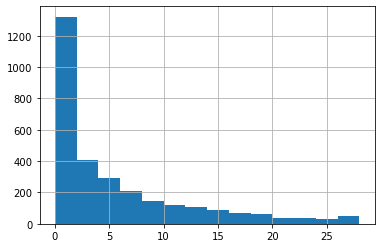

In [11]:
steam_df.Hours_played.hist(bins = np.arange(0, 30, 2))

In [12]:
print('Summary of data')
print('Total number of records :', steam_df.shape[0])
print('Total number of Users :', len(np.unique(steam_df.userId)))
print('Total number of unique steam games :', len(np.unique(steam_df.Steam_game)))
print('Average number of games per user', steam_df.shape[0]/len(np.unique(steam_df.userId)))

Summary of data
Total number of records : 3000
Total number of Users : 164
Total number of unique steam games : 1119
Average number of games per user 18.29268292682927


## Building the Pivot Table/User-Item matrix by pivoting steam_data

In [13]:
steam_pivot = steam_df.pivot(values='Hours_played', index='userId', columns='Steam_game')

In [14]:
steam_pivot.head()

Steam_game,3DMark,4 Elements,7 Days to Die,9 Clues The Secret of Serpent Creek,A Valley Without Wind 2,A Virus Named TOM,A.R.E.S.,A.V.A - Alliance of Valiant Arms,ARK Survival Evolved,Abyss The Wraiths of Eden,...,Your Doodles Are Bugged!,Zack Zero,Zeno Clash,Zero Gear,Zombie Driver,Zombie Panic Source,Zombie Shooter 2,ibb & obb,inMomentum,theHunter
userId,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
steam_pivot.shape

(164, 1119)

## The Approach Used (Latent factor models/Matrix Factorization)

Latent factor model is an approach that tries to explain the ratings by characterizing both items and users on, say, 20 to 100 factors inferred from the ratings patterns(Number of gaming hours for games in this case). For movies, the discovered factors might measure obvious dimensions such as comedy versus drama, amount of action, or orientation to children; less well-defined dimensions such as depth of character development or quirkiness; or completely uninterpretable dimensions. For games, the discovered factors might be the genres of the games such as adventure, MMORPG, action and strategy-based. For users, each factor measures how much the user likes games that score high on the corresponding movie factor. 

Reference : https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf

### Matrix Factorization Methods
In its basic form, matrix factorization characterizes both items and users by vectors of factors inferred from item rating patterns.

High correspondence between item and user factors leads to a vector $q_{i}$ for $i^{th}$ item, and each user u is associated with a vector $p_{u}$. For a given item i, the elements of $q_{i}$ measure the extent to which the item possesses those **latent factors**. For a given user u, the elements of $p_{u}$ measure the extent of interest the user has in items that are high on the corresponding **latent factors**.

The resulting dot product, $\hat r = $$q_{i}^{T}$$p_{u}$, captures the interaction between user u and item i - the user's overall interest in the item's characteristics.

### Such a model is somewhat related to Singular Value Decomposition (SVD)
Singular value decomposition (SVD) is a well-established technique for identifying latent semantic factors in any given matrix. Any matrix A can be decomposed into U, $\Sigma$ and $V^{T}$. Applying SVD in the collaborative filtering domain requires factoring the user-item rating matrix. This often raises difficulties due to the high portion of missing values caused by sparseness in the user-item ratings matrix. Conventional SVD is undefined when knowledge about the matrix is incomplete. Moreover, carelessly addressing only the relatively few known entries is highly prone to overfitting.

Earlier systems relied on imputation to fill in missing
ratings and make the rating matrix dense$^2$.However, imputation can be very expensive as it significantly increases the amount of data. In addition, inaccurate imputation might distort the data considerably.

Hence, more recent works$^{3-6}$ suggested modeling directly the observed ratings only, while avoiding overfitting through a regularized model. To learn the factor vectors ($p_{u}$ and $q_{i}$), the system minimizes the regularized squared error on the set of known ratings:
<img src = 'pictures/objective_function.png'> 

The system learns the model by fitting the previously observed ratings. However, the goal is to generalize those previous ratings in a way that predicts future, unknown ratings. Thus, the system should avoid overfitting the observed data by regularizing the learned parameters, whose magnitudes are penalized. The constant λ controls the extent of regularization and is usually determined by cross-validation. Ruslan Salakhutdinov and Andriy Mnih’s “Probabilistic Matrix Factorization”$^{7}$ offers a probabilistic foundation for regularization. 


2. B.M. Sarwar et al., “Application of Dimensionality Reduction in Recommender System—A Case Study,” Proc. KDD
Workshop on Web Mining for e-Commerce: Challenges and
Opportunities (WebKDD), ACM Press, 2000. 
3. S. Funk, “Netflix Update: Try This at Home,” Dec. 2006;
http://sifter.org/~simon/journal/20061211.html.
4. Y. Koren, “Factorization Meets the Neighborhood: A Multifaceted Collaborative Filtering Model,” Proc. 14th ACM
SIGKDD Int’l Conf. Knowledge Discovery and Data Mining,
ACM Press, 2008, pp. 426-434.
5. A. Paterek, “Improving Regularized Singular Value Decomposition for Collaborative Filtering,” Proc. KDD Cup
and Workshop, ACM Press, 2007, pp. 39-42.
6. G. Takács et al., “Major Components of the Gravity Recommendation System,” SIGKDD Explorations, vol. 9, 2007, pp.
80-84.
7. R. Salakhutdinov and A. Mnih, “Probabilistic Matrix Factorization,” Proc. Advances in Neural Information Processing
Systems 20 (NIPS 07), ACM Press, 2008, pp. 1257-1264. 

## Approximate SVD with stochastic gradient descent (SGD)
**The Learning Algorithm that I am implementing is Stochastic Gradient Descent to minimize the following loss function.**
<img src='pictures/objective_function.png'>

Objective : Try to find P and q such that $\widehat{R} = P Q^{T}$ is close to  $R$ **for the item-user pairs already rated**.

The pseudocode of the Stochastic gradient descent(SGD) is as follows :

1.   initialize P and Q to random values

2.   for $n_{epochs}$ passes on the data:

    *   for all known ratings $r_{ui}$
        *   compute the error between the predicted rating $p_u \cdot q_i$ and the known ratings $r_{ui}$:
        $$ err = r_{ui} - p_u \cdot q_i $$
        
        *   update $p_u$ and $q_i$ by computing the partial derivative of loss function (2) with respect to $q_i$ and $p_u$ with the following rule:
        $$ p_u \leftarrow p_u + \gamma \cdot (err \cdot q_i -\lambda \cdot p_u)$$
        $$ q_i \leftarrow q_i + \gamma \cdot (err \cdot p_u - \lambda \cdot q_i)$$







In [16]:
## Keep some of the known entries in the pivot table as evaluation set later on. The evaluation set will not be included in
# training, instead be used in the evaluation to see how well the model performs on unseen data
MIN_GAMES_PLAYED = 7
DELETE_GAMES_COUNT = 2

def train_test_split(games):
    validation = np.zeros(games.shape)
    train = games.copy()
    
    for user in np.arange(games.shape[0]):
        if len(games[user,:].nonzero()[0]) >= MIN_GAMES_PLAYED:
            val_hours_played = np.random.choice(
                games[user,:].nonzero()[0],
                size=DELETE_GAMES_COUNT,
                replace=False
            )
            train[user, val_hours_played] = 0
            validation[user, val_hours_played] = games[user, val_hours_played]
    return train, validation

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

## Calculate the Root Mean Squared Error
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    #print(prediction)
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    #print(ground_truth)
    return sqrt(mean_squared_error(prediction, ground_truth))

In [18]:
steam_df.head()

,userId,Steam_game,Hours_played
65428,5250,Portal 2,13.6
65430,5250,Alien Swarm,4.9
65432,5250,Team Fortress 2,0.8
65434,5250,Dota 2,0.2
55933,76767,Portal 2,15.0


**Because the userId rows and Steam_game column are very messy, I first map those rows and columns' values into continous integer values for better interpretation in the training phase later. After training, the rows and columns' values will then again be mapped to original userId and Steam_game values respectively.**

In [19]:
def encode_ids(data):
    '''Takes a rating dataframe and return: 
    - a simplified rating dataframe with ids in range(nb unique id) for users and games
    - 2 mapping dictionaries
    
    '''

    data_encoded = data.copy()
    
    users = pd.DataFrame(data_encoded.userId.unique(),columns=['userId'])  # df of all unique users
    dict_users = users.to_dict()
    inv_dict_users = {v: k for k, v in dict_users['userId'].items()}
    
    items = pd.DataFrame(data_encoded.Steam_game.unique(),columns=['Steam_game']) # df of all unique items
    dict_items = items.to_dict()
    inv_dict_items = {v: k for k, v in dict_items['Steam_game'].items()}

    data_encoded.userId = data_encoded.userId.map(inv_dict_users)
    data_encoded.Steam_game = data_encoded.Steam_game.map(inv_dict_items)

    return data_encoded, dict_users, dict_items

In [20]:
# Adapted from http://nicolas-hug.com/blog/matrix_facto_4
def SGD(data_df,           # dataframe containing 1 user|item|rating per row
        n_factors = 10, # number of factors
        gamma = .01,    # number of factors
        n_epochs = 5,   # number of iteration of the SGD procedure
        lambda_val = 0.1
       ):
    '''Learn the vectors P and Q (ie all the weights p_u and q_i) with SGD.
    '''
    train_errors = []
    val_errors = []
    # Encoding userId's and itemId's in data
    data_temp, dict_users, dict_items = encode_ids(data_df)
    data = data_temp.pivot(values='Hours_played', index='userId', columns='Steam_game').fillna(0).values
    
    train, val = train_test_split(data)
    
    n_users = data_temp.userId.nunique()  # number of unique users
    n_items = data_temp.Steam_game.nunique()  # number of unique items
    
    # Randomly initialize the user and item factors.
    p = np.random.normal(0, .1, (n_users, n_factors))
    q = np.random.normal(0, .1, (n_items, n_factors))
    
    users, items = train.nonzero()
    
    # Optimization procedure
    for epoch in range(n_epochs):
        #print('\n--------------------------------------------')
        #print ('Epoch: ', epoch)
        #print('--------------------------------------------\n')
        # Loop over the rows in data
        #for index in range(data.shape[0]):
        for u, i in zip(users, items):
            err = data[u, i] - np.dot(p[u], q[i].transpose())
                      
            # Update vectors p_u and q_i
            p_old = p[u]
            p[u] = p[u] + gamma*(err*q[i] - lambda_val * p[u])  # cf. update rule above 
            q[i] = q[i] + gamma*(err*p_old - lambda_val * q[i])

        train_rmse = rmse(np.dot(p, q.transpose()), train)
        val_rmse = rmse(np.dot(p, q.transpose()), val)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    return p, q, train_errors, val_errors 

In [21]:
## Use GridSearch to search for the best set of hyperparameters
n_factors = [10, 20, 30]
gammas = [0.005, 0.01]
lambda_values = [0.001, 0.1, 0.5]
for factor in n_factors:
    for gamma in gammas:
        for reg in lambda_values:
            p, q, train_error, val_error = SGD(steam_df, n_factors = factor, gamma = gamma, lambda_val = reg)
            print(f'\nHyperparameters : n_factors = {factor}, gamma = {gamma}, lambda = {reg} : \n \
                  Train Error : {train_error[-1]}, Validation Error : {val_error[-1]}')


Hyperparameters : n_factors = 10, gamma = 0.005, lambda = 0.001 : 
                   Train Error : 7.5791906036006145, Validation Error : 10.30740778314772

Hyperparameters : n_factors = 10, gamma = 0.005, lambda = 0.1 : 
                   Train Error : 8.165560228527374, Validation Error : 9.122551625642048

Hyperparameters : n_factors = 10, gamma = 0.005, lambda = 0.5 : 
                   Train Error : 8.605385178852922, Validation Error : 9.898517720099452

Hyperparameters : n_factors = 10, gamma = 0.01, lambda = 0.001 : 
                   Train Error : 4.228309759593769, Validation Error : 6.994594051712614

Hyperparameters : n_factors = 10, gamma = 0.01, lambda = 0.1 : 
                   Train Error : 4.543961852473185, Validation Error : 6.683611267028808

Hyperparameters : n_factors = 10, gamma = 0.01, lambda = 0.5 : 
                   Train Error : 5.313731349962117, Validation Error : 7.252519414163006

Hyperparameters : n_factors = 20, gamma = 0.005, lambda = 0.001 : 


In [22]:
# Use the best set of hyperparameters for training
p, q, train_errors, val_errors = SGD(steam_df, n_epochs= 10, n_factors = 20, gamma = 0.01, lambda_val = 0.001)

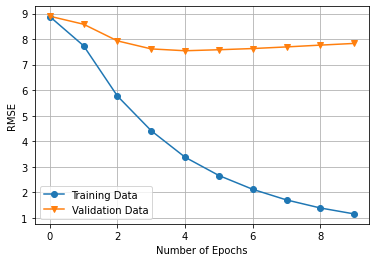

In [23]:
# Plotting the RMSE curve against number of epochs
import matplotlib.pyplot as plt
%matplotlib inline

n_epochs = 10
#print(train_errors)
#print(val_errors)
plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data');
plt.plot(range(n_epochs), val_errors, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [24]:
# Prediction by taking the dot product of P and Q learned from training
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,...,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118
0,12.383294,1.451264,0.232396,1.470991,-0.020867,0.349337,1.399701,1.807421,0.398799,2.784404,...,0.362070,0.250427,0.684585,0.328728,0.367135,0.456200,0.004176,0.267966,-0.065678,0.161631
1,17.770040,3.365929,15.186948,16.227287,0.367443,0.819089,4.280070,9.710557,1.171677,11.022493,...,0.378206,1.102541,1.787590,0.715997,1.110461,1.322665,1.646907,0.732139,0.519405,0.395802
2,5.529344,1.007621,1.661232,6.329009,0.021442,1.377714,1.872424,2.629794,0.296677,0.813985,...,-0.202272,-0.403468,1.006397,0.369914,0.312172,0.316749,0.736596,0.291610,0.914974,0.350733
3,1.092476,0.379616,-0.113015,0.267281,-0.010387,0.092644,0.031335,-0.248624,-0.022822,-0.154926,...,0.008239,-0.065974,0.044150,-0.023206,-0.014912,-0.067590,-0.090965,0.046548,-0.014609,0.004328
4,0.680236,-0.287812,-0.393033,0.009498,0.094678,0.120978,0.307848,0.734823,0.056164,0.247665,...,0.030794,-0.061306,0.161673,0.043259,0.080260,-0.008076,0.042078,0.022351,0.036532,0.006390


However, it is using the encode ids ; we need to retrieve the association of encoded ids to original ids, and apply it:

In [25]:
steam_df_encoded, dict_users, dict_items = encode_ids(steam_df)

Taking the dot product of P and Q matrix will then return the prediction pivot table

In [26]:
df_user_item_filled.rename(columns=(dict_items['Steam_game']), inplace=True)
df_user_item_filled.rename(index=(dict_users['userId']), inplace=True)

# Sort index/rows (userId's) and columns (itemId's)
df_user_item_filled.sort_index(axis=0, inplace=True)
df_user_item_filled.sort_index(axis=1, inplace=True)

df_user_item_filled.head()

,3DMark,4 Elements,7 Days to Die,9 Clues The Secret of Serpent Creek,A Valley Without Wind 2,A Virus Named TOM,A.R.E.S.,A.V.A - Alliance of Valiant Arms,ARK Survival Evolved,Abyss The Wraiths of Eden,...,Your Doodles Are Bugged!,Zack Zero,Zeno Clash,Zero Gear,Zombie Driver,Zombie Panic Source,Zombie Shooter 2,ibb & obb,inMomentum,theHunter
5250,-0.284768,1.970098,4.006676,1.118885,0.174361,0.328728,0.263959,0.146135,2.583678,1.375672,...,0.111115,0.649365,0.040066,0.671119,0.081635,0.225620,0.133933,0.702665,0.262017,-0.031102
76767,10.294062,6.224097,4.664424,2.217780,0.215536,0.715997,-0.015798,0.191077,13.317186,3.521740,...,0.690818,1.407784,0.153876,2.310234,-0.123697,1.256372,0.950945,1.072775,0.121856,0.301004
86540,2.633153,1.685004,3.240511,0.878718,-0.306904,0.369914,0.497324,0.191471,2.952592,0.989448,...,0.185648,1.009299,1.052092,0.779739,0.458941,0.622804,-0.113164,0.183981,0.509516,0.297257
144736,-0.118246,0.086542,0.427382,0.104182,0.002349,-0.023206,0.042428,0.038666,0.121121,-0.031495,...,-0.020275,0.122602,0.074181,0.030784,-0.002859,0.001892,-0.053834,0.025463,0.071250,-0.018534
181212,-0.394840,0.293917,0.506608,0.169874,-0.024509,0.043259,0.065746,0.012264,-0.255215,0.245843,...,0.101068,0.039299,0.026657,0.084716,0.057035,0.049331,-0.125736,0.125129,0.084356,-0.024785


Taking a single steam user for example, user561758 likes games that have adventurous, First person shooting characteristics. The recommendation games that are predicted are quite similar to the games played by him before.

In [27]:
## Original data
steam_pivot.iloc[10].sort_values(ascending=False)[:10]

Steam_game
Wolfenstein                      26.0
Left 4 Dead 2                    26.0
Battlefield Bad Company 2        20.0
Call of Duty Modern Warfare 2    17.5
Metro 2033                       16.9
Half-Life 2                      16.6
Killing Floor                    14.3
Duke Nukem Forever               14.3
Sniper Elite V2                  14.2
Mass Effect                      13.7
Name: 561758, dtype: float64

In [28]:
## Prediction
df_user_item_filled.iloc[10].sort_values(ascending=False)[:10]

Wolfenstein                  25.590451
Battlefield Bad Company 2    22.671967
Left 4 Dead 2                21.714445
BioShock Infinite            20.865560
Far Cry 2                    19.329315
Orcs Must Die! 2             19.102290
FlatOut Ultimate Carnage     18.953534
RAGE                         18.873188
Total War SHOGUN 2           18.778985
Batman Arkham Knight         18.032760
Name: 561758, dtype: float64